In [6]:
%cd /home/josh/PycharmProjects/Muon_magnets

/home/josh/PycharmProjects/Muon_magnets


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import time

import modules.functions as func
from modules.muon import Muon
from modules.grid import Grid
from modules.ensemble import Ensemble
from modules.multi_process import MP_fields
from modules.model_equations import static_GKT

%matplotlib inline

#### Muons in randomly generated fields

In [24]:
muon = Muon(lifetime=20e-6)
print(muon.__dict__)

{'lifetime': 2e-05, 'spin_dir': array([ 0,  0, -1]), 'phase': 0, 'loc': array([0, 0, 0])}


Text(0.5, 1.0, 'Polarisation for single muon in 1mT field (+x dir)')

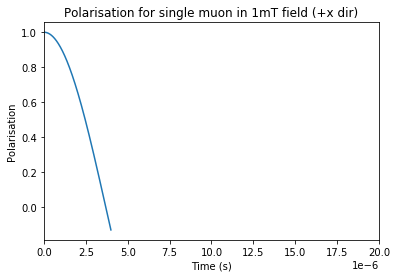

In [29]:
muon.field = np.array([0.1e-3, 0 ,0])
lifetime_polarisation = muon.full_relaxation(muon.field)  # Get the polarisation of the muon as a function of time

time = np.linspace(0, muon.lifetime, muon.TIME_RESOLUTION)  # Create times to plot polarisation against

fig, ax = plt.subplots()
ax.plot(time, lifetime_polarisation)
ax.ticklabel_format(axis="x", style="sci", scilimits=(-6, -6))

ax.set_xlim(0, muon.lifetime)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Polarisation")
ax.set_title("Polarisation for single muon in 1mT field (+x dir)")

In [ ]:
LOAD_OBJECTS = False

RUN_NAME = "15X15_R_4"

if LOAD_OBJECTS:  # Load from file
    island_grid = Grid(run_name=RUN_NAME, load_only=True)
    particles = Ensemble(run_name=island_grid.run_name, load_only=True)

else:  # Calculate and save grid and ensemble
    NUM_MUONS = 20000
    SPREAD_VALUES = {"x_width": 10e-6, "y_width": 10e-6, "z_width": 10e-6,
                     "x_mean": 0, "y_mean": 0, "z_mean": 100e-6}
    island_grid = Grid()
    RUN_NAME = island_grid.run_name
    particles = Ensemble(N=NUM_MUONS, spread_values=SPREAD_VALUES, run_name=RUN_NAME)
    particles.set_generic("spin_dir", [1, 0, 0])
    particles.calculate_fields(island_grid)
    particles.load_fields()